In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Step 01: Loading dataset
df = pd.read_csv('carEvaluation.csv')

In [ ]:
# dataset overview
print("Dataset Head:\n", df.head())
print("Dataset Info:\n")
df.info()

Dataset Head:
   buying maintenance  doors  persons lug_boot safety  class
0  vhigh       vhigh      2        2    small   high  unacc
1  vhigh       vhigh      2        2      med    low  unacc
2  vhigh       vhigh      2        2      med    med  unacc
3  vhigh       vhigh      2        2      med   high  unacc
4  vhigh       vhigh      2        2      big    low  unacc
Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726 entries, 0 to 1725
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1726 non-null   object
 1   maintenance  1726 non-null   object
 2   doors        1726 non-null   int64 
 3   persons      1726 non-null   int64 
 4   lug_boot     1726 non-null   object
 5   safety       1726 non-null   object
 6   class        1726 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.5+ KB


In [ ]:
# Encoding Data
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

Categorical data encoding completed.


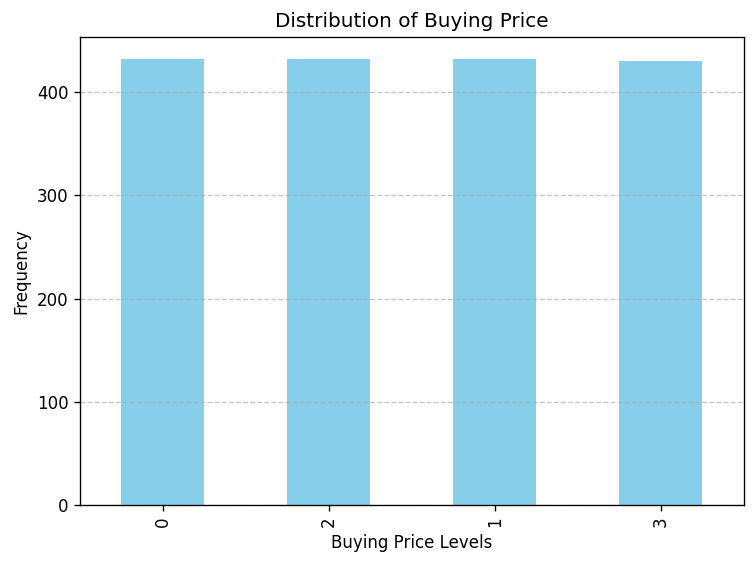

In [ ]:
# Histogram plot
plt.figure(dpi=120)
df['buying'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Buying Price')
plt.xlabel('Buying Price Levels')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

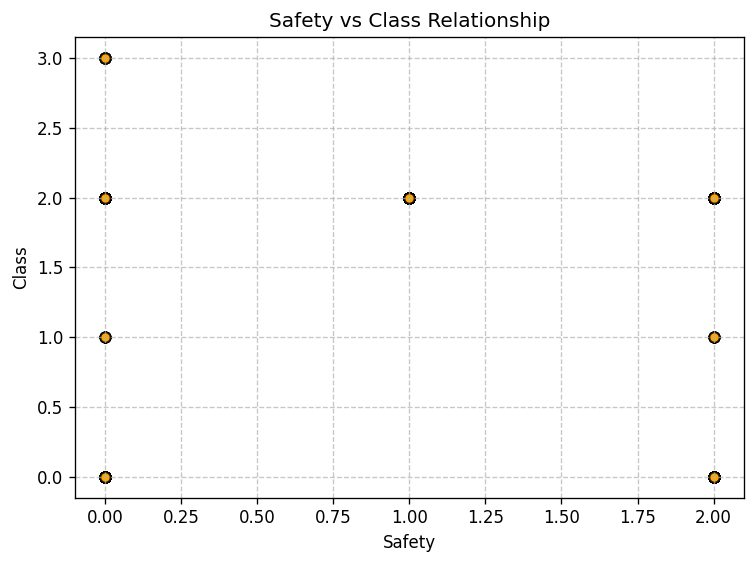

In [ ]:
# Scatter Plot
plt.figure(dpi=120)
plt.scatter(df['safety'], df['class'], alpha=0.7, color='orange', edgecolor='k')
plt.title('Safety vs Class Relationship')
plt.xlabel('Safety')
plt.ylabel('Class')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


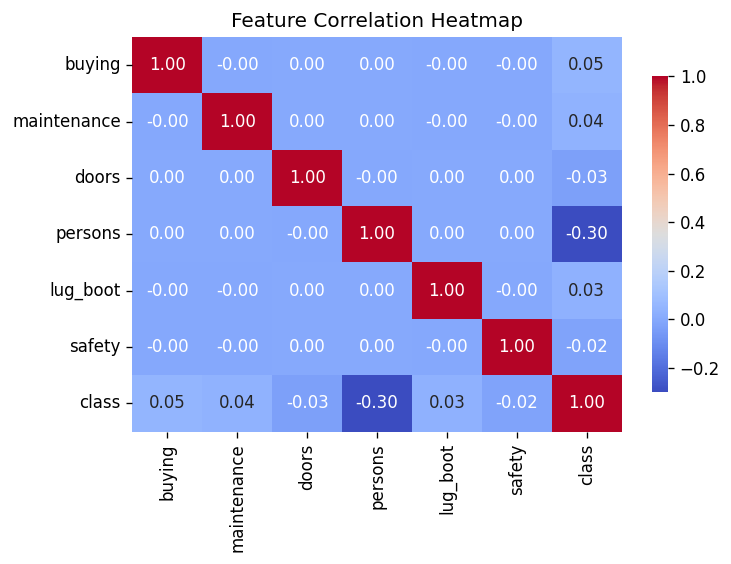

In [ ]:
# Correlation Heatmap
plt.figure(dpi=120)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

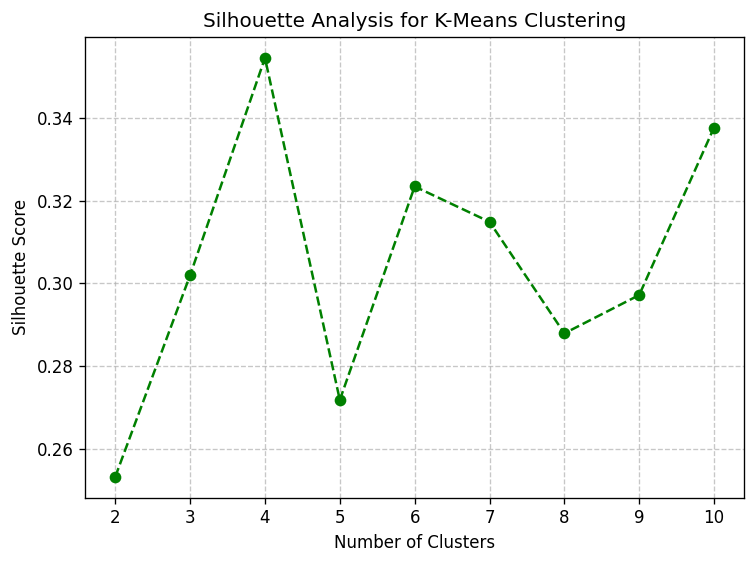

In [ ]:
#  K-Means Clustering
features = df[['buying', 'maintenance', 'safety']]
range_n_clusters = range(2, 11)
silhouette_avg = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg.append(silhouette_score(features, cluster_labels))

# plotting
plt.figure(dpi=120)
plt.plot(range_n_clusters, silhouette_avg, marker='o', color='green', linestyle='--')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

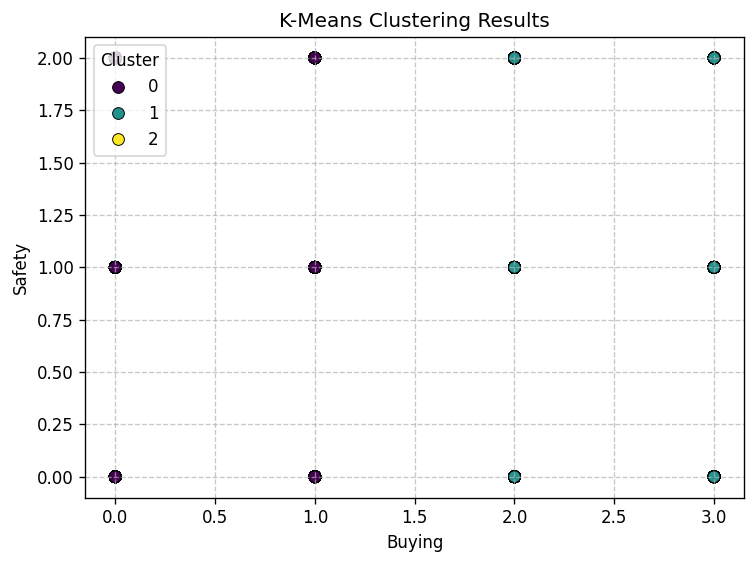

In [ ]:
#  K-Means Clustering
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# plotting clustering Results
plt.figure(dpi=120)
sns.scatterplot(data=df, x='buying', y='safety', hue='Cluster', palette='viridis', s=50, edgecolor='k')
plt.title('K-Means Clustering Results')
plt.xlabel('Buying')
plt.ylabel('Safety')
plt.legend(title='Cluster', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


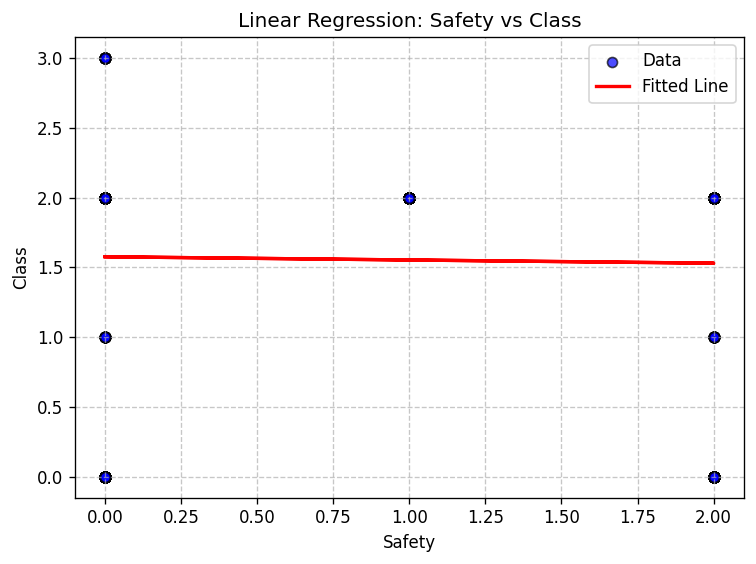

In [ ]:
# Linear Regression
x = df['safety'].values.reshape(-1, 1)
y = df['class'].values
model = LinearRegression()
model.fit(x, y)

# plotting line fitting
plt.figure(dpi=120)
plt.scatter(x, y, color='blue', alpha=0.7, label='Data', edgecolor='k')
plt.plot(x, model.predict(x), color='red', linestyle='-', linewidth=2, label='Fitted Line')
plt.title('Linear Regression: Safety vs Class')
plt.xlabel('Safety')
plt.ylabel('Class')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()